# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we explore the cleaned dataset containing clinical, cognitive, behavioral, and lifestyle information related to Alzheimer's disease. This dataset was prepared in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb) and includes key patient details such as age, gender, test scores, medical history, and daily habits.

The goal of this analysis is to better understand how different features relate to the Alzheimer's diagnosis. We want to:

- Examine how individual variables are distributed  
- Compare feature values across diagnosis groups  
- Identify patterns, trends, and correlations that could be useful for prediction  
- Select potentially important features for use in machine learning models

This exploration helps us make informed decisions about which variables to include and how to prepare them for modeling. It also supports our main research question from Notebook 1:

**Can we predict Alzheimer’s diagnosis using clinical, cognitive, and lifestyle-related features?**

The insights we gain here will directly guide the model development phase in Notebook 4 (04_Model_Training_and_Evaluation.ipynb).

## Understanding Values in the Cleaned Dataset
The dataset we are working with has been cleaned and is now ready for analysis and modeling. All missing values have been handled, and the structure is complete. The features describe various aspects of each patient’s health, habits, and cognitive condition. Below is a breakdown of the columns grouped by category. This overview helps us understand what each variable represents and how it fits into the overall picture of Alzheimer’s risk. These categories guide us as we choose which features to analyze, scale, or model.

#### Demographics
- **Age** – Patient’s age, mostly between 60 and 90  
- **Gender** – 0 = Male, 1 = Female  
- **Ethnicity** – 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other  
- **EducationLevel** – 0 to 3, where higher numbers represent more education  

#### Lifestyle
- **Smoking** – 0 = No, 1 = Yes  
- **AlcoholConsumption** – Numeric value showing amount of alcohol consumed  
- **PhysicalActivity** – Activity level score  
- **DietQuality** – Diet health score  
- **SleepQuality** – Sleep health score  
- **BMI** – Body Mass Index  

#### Medical History
- **FamilyHistoryAlzheimers** – 0 = No, 1 = Yes (genetic link)  
- **CardiovascularDisease** – 0 = No, 1 = Yes  
- **Diabetes** – 0 = No, 1 = Yes  
- **Depression** – 0 = No, 1 = Yes  
- **HeadInjury** – 0 = No, 1 = Yes  
- **Hypertension** – 0 = No, 1 = Yes  

#### Clinical Values
- **SystolicBP** – Systolic blood pressure  
- **DiastolicBP** – Diastolic blood pressure  
- **CholesterolTotal** – Total cholesterol  
- **CholesterolLDL** – "Bad" cholesterol  
- **CholesterolHDL** – "Good" cholesterol  
- **CholesterolTriglycerides** – Another cholesterol type  

#### Cognitive and Functional Assessments
- **MMSE** – Mini-Mental State Exam score (0–30)  
- **FunctionalAssessment** – Measures daily function  
- **ADL** – Activities of Daily Living score  
- **MemoryComplaints** – 0 = No, 1 = Yes  
- **BehavioralProblems** – 0 = No, 1 = Yes  

#### Symptoms and Behavior
- **Confusion** – 0 = No, 1 = Yes  
- **Disorientation** – 0 = No, 1 = Yes  
- **PersonalityChanges** – 0 = No, 1 = Yes  
- **DifficultyCompletingTasks** – 0 = No, 1 = Yes  
- **Forgetfulness** – 0 = No, 1 = Yes  
- **Diagnosis** – This is the target column: 0 = No Alzheimer’s, 1 = Alzheimer’s  

#### Removed Columns
- **PatientID** – Unique identifier for each patient, not used for prediction 
- **DoctorInCharge** – Removed due to containing anonymized text, not relevant for analysis  

---------------------------------

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

**1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?**
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.

**2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.

---------------------------

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [5]:
# Add the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Import custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Import commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Run environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


-------------------------

## Load Dataset

### We load our cleaned dataset

In [10]:
df = pd.read_csv("../data/alzheimers_clean.csv")
print("Cleaned dataset loaded. Shape:", df.shape)

Cleaned dataset loaded. Shape: (2149, 33)


--------------------

### Using Outlier-Free Dataset
In Notebook 02, we removed outliers from the dataset using the IQR method. That version was saved as alzheimers_no_outliers.csv.
If we want to re-run any visualizations with this dataset, we can load that version here.

In [14]:
# Load the outlier-free version (optional)
df_no_outliers = pd.read_csv("../data/alzheimers_no_outliers.csv")
print("Outlier-free dataset loaded. Shape:", df_no_outliers.shape)

Outlier-free dataset loaded. Shape: (2149, 33)


### Outlier Check Confirmation
We compared three features (MMSE, BMI, CholesterolTotal) across the original cleaned dataset and the version with outliers removed using the IQR method.

There is no visual or structural difference between the two datasets. This confirms that:

- The original dataset did not contain extreme values based on the IQR rule
- All data values fall within realistic and clinically expected ranges
- The outlier removal step in Notebook 02 was executed correctly, but had no effect on the dataset size or shape

Therefore, we continue analysis using the cleaned dataset, as the outlier-free version is functionally the same.

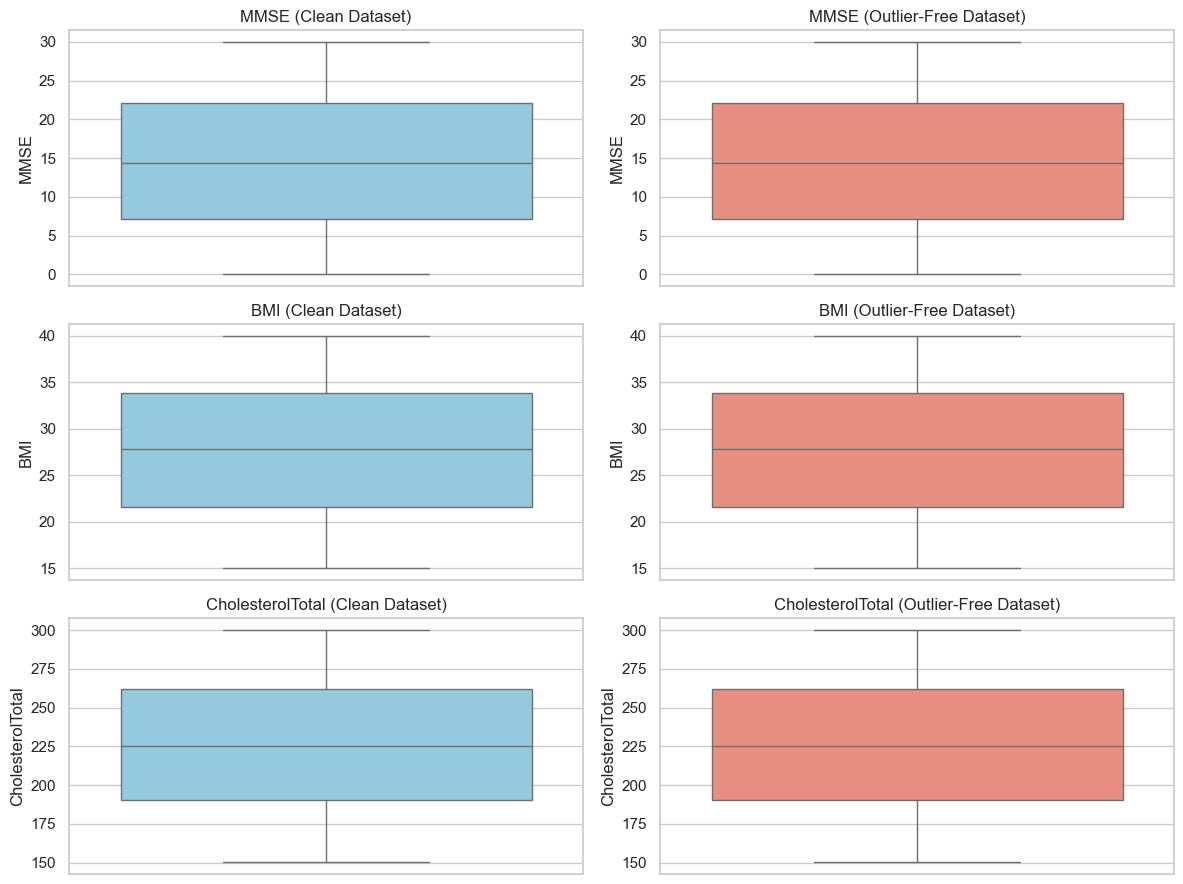

Plot saved to: ../plots/clean_vs_no_outliers_boxplot.png
Caption saved to: ../plots/clean_vs_no_outliers_boxplot.txt


In [17]:
# Load both datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv("../data/alzheimers_clean.csv")
df_no_outliers = pd.read_csv("../data/alzheimers_no_outliers.csv")

# Define features to compare
key_features = ["MMSE", "BMI", "CholesterolTotal"]

# Generate side-by-side boxplots
plt.figure(figsize=(12, 9))
for idx, feature in enumerate(key_features):
    # Plot clean dataset
    plt.subplot(3, 2, 2 * idx + 1)
    sns.boxplot(y=df_clean[feature], color="skyblue")
    plt.title(f"{feature} (Clean Dataset)")

    # Plot outlier-free dataset
    plt.subplot(3, 2, 2 * idx + 2)
    sns.boxplot(y=df_no_outliers[feature], color="salmon")
    plt.title(f"{feature} (Outlier-Free Dataset)")

plt.tight_layout()
plt.show()

# Save the plot using helper method in utils folder 
fig = plt.gcf()
save_plot(
    fig,
    filename="clean_vs_no_outliers_boxplot.png",
    caption="Boxplots comparing selected features before and after outlier removal.",
    folder_path="../plots"
)

--------------------

## Target Variable: Diagnosis

We start by reviewing the distribution of the target variable Diagnosis, which indicates whether the patient has been diagnosed with Alzheimer's disease. Understanding the distribution of this variable helps us check whether the dataset is balanced or imbalanced, which can affect how we train and evaluate models later. The variables are:

- 0 = Patient does not have Alzheimer's
- 1 = Patient has Alzheimer's

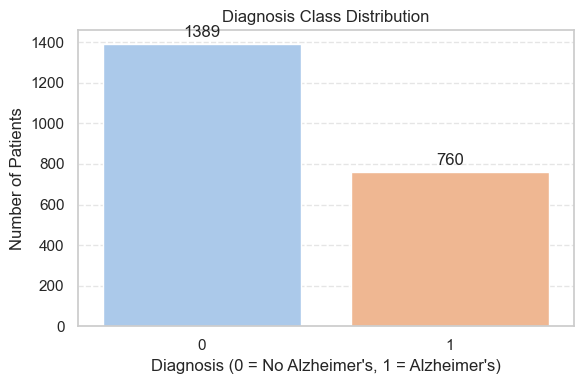

Plot saved to: ../plots/diagnosis_class_distribution.png
Caption saved to: ../plots/diagnosis_class_distribution.txt


In [22]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Diagnosis", hue="Diagnosis", palette="pastel", legend=False)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)")
plt.ylabel("Number of Patients")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.tight_layout()
plt.show()

# Save the plot using helper method in utils folder
fig = plt.gcf()
save_plot(
    fig,
    filename="diagnosis_class_distribution.png",
    caption="Bar chart showing the number of patients with and without Alzheimer's diagnosis.",
    folder_path="../plots"
)

### Understanding the Results

This bar chart shows the number of patients in each diagnosis category. There are 1,389 individuals without Alzheimer’s and 760 with Alzheimer’s. While not perfectly balanced, this distribution is reasonably proportionate.

Having both classes well-represented is important for training machine learning models. It ensures the model has enough examples to learn patterns from both groups. If the dataset were heavily imbalanced, the model might become biased toward the majority class and struggle to predict the minority class accurately. Overall, this class distribution is suitable for binary classification tasks and provides a solid foundation for building predictive models.

--------------------------------

## Binary Features by Diagnosis

The following barplots show how common each binary feature (e.g., Depression, Head Injury, Hypertension) is within each diagnosis group. For each feature, we calculate the percentage of patients who have the condition (value = 1), separately for patients with and without Alzheimer’s.

By comparing these percentages, we can see which symptoms or risk factors are more frequent among Alzheimer’s patients. This helps us better understand which features may be useful for identifying patterns or building predictive models for Alzheimer’s diagnosis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

# Save each plot separately
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    values = df.groupby("Diagnosis")[feature].mean() * 100
    ax = sns.barplot(x=values.index, y=values.values, color='steelblue')
    plt.title(f"{feature} by Diagnosis")
    plt.ylabel("% with value = 1")
    plt.xlabel("Diagnosis")
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

    # Save each figure
    fig = plt.gcf()
    save_plot(
        fig,
        filename=f"binary_{feature.lower()}.png",
        caption=f"Bar chart showing percentage of patients with {feature} = 1, grouped by Alzheimer's diagnosis.",
        folder_path="../plots/binary_features"
    )

    plt.close()

In [ ]:
### Interpretation of Binary Features

We analyzed several binary features to see how their occurrence differs between patients with and without Alzheimer’s. The y-axis in all plots shows the percentage of patients who have the value 1 (i.e. presence of the condition), for each group.

**Forgetfulness**  
Forgetfulness occurs in about 30% of patients in both groups. There is no significant difference between Alzheimer’s and non-Alzheimer’s patients for this feature.

**Personality Changes**  
Personality changes are quite rare in both groups (around 15%). We see little difference between the two diagnosis groups.

**Difficulty Completing Tasks**
Roughly 15% of patients in both groups report difficulty completing tasks. This feature shows no meaningful difference between the two groups.

**Confusion**  
About 20% of patients in both groups experience confusion. We observe no major difference between Alzheimer’s and non-Alzheimer’s patients.

**Disorientation**  
Disorientation also occurs in about 20% of both groups, with no clear difference between them.

**Memory Complaints**  
Memory complaints show us a difference:  
- In the non-Alzheimer’s group, around 10% report memory complaints.  
- In the Alzheimer’s group, this increases to nearly 40%.  
This suggests that memory complaints may be a useful indicator for Alzheimer’s diagnosis.

**Behavioral Problems**  
Behavioral problems are reported by roughly 10% of non-Alzheimer’s patients and around 30% of Alzheimer’s patients. This shows a moderate difference and may provide some predictive value.

**HeadInjury**  
History of head injury is rare, with very low percentages (below 10%) in both groups, and no significant difference.

**Hypertension**  
Hypertension occurs in around 15% of both groups, showing no clear difference.

**Diabetes**  
Diabetes is present in roughly 15% of both groups, again showing no noticeable difference.

**Depression**  
Depression occurs in around 20% of both groups, with no major difference observed.

**Family History Alzheimers**  
A family history of Alzheimer’s is present in about 25% of non-Alzheimer’s patients and slightly lower in Alzheimer’s patients, though the difference is small.

**Cardiovascular Disease**  
Both groups have similar low percentages (around 10-15%) of cardiovascular disease history.

**Gender**  
The gender distribution is quite balanced between groups, with approximately 50% female in both.

**Smoking**  
Around 30% of both groups report smoking. No difference is seen between Alzheimer’s and non-Alzheimer’s patients.

------------------------

--------------------------

## Distribution of Continuous Features

Here we explore the distribution of continuous features in the dataset. This step helps us answer the following questions:

- Is the feature normally distributed, skewed, or multimodal?
- Are there any visible outliers?
- Do we need to apply scaling or transformations later for modeling?

We use histograms with KDE (kernel density estimate) overlays to visualize the shape of each distribution across the patient population.

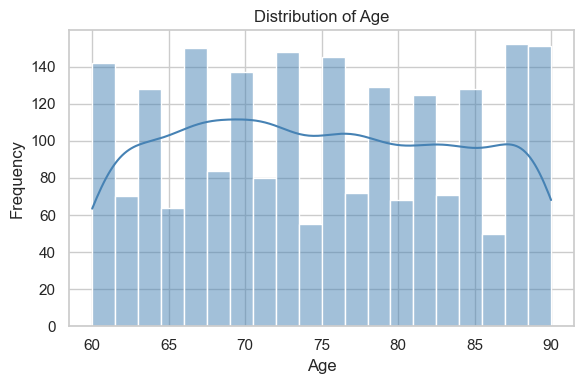

Plot saved to: ../plots/age_distribution.png
Caption saved to: ../plots/age_distribution.txt


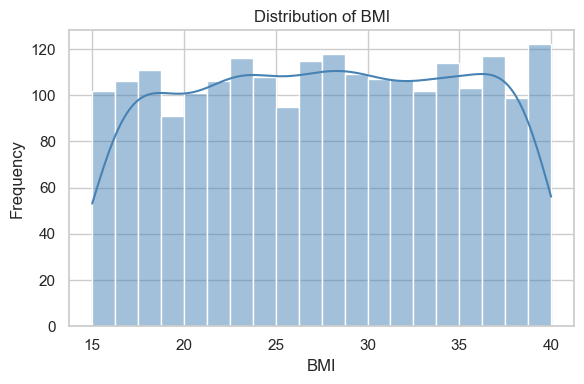

Plot saved to: ../plots/bmi_distribution.png
Caption saved to: ../plots/bmi_distribution.txt


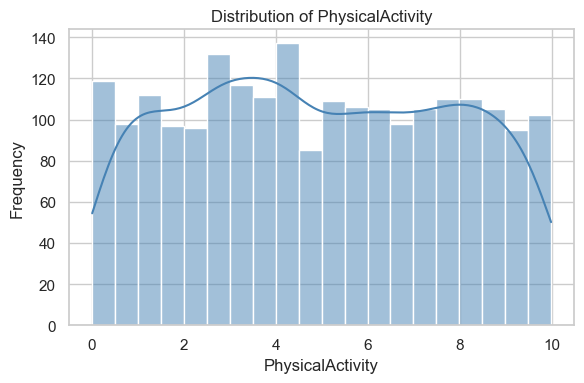

Plot saved to: ../plots/physicalactivity_distribution.png
Caption saved to: ../plots/physicalactivity_distribution.txt


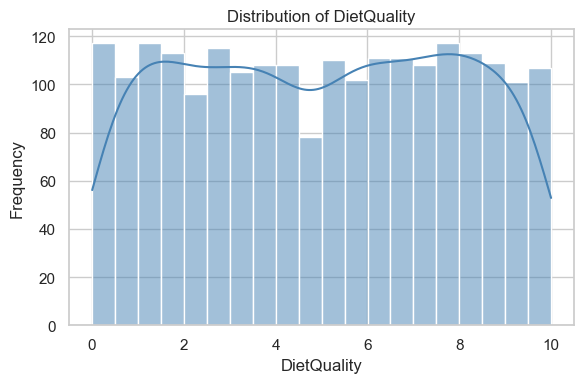

Plot saved to: ../plots/dietquality_distribution.png
Caption saved to: ../plots/dietquality_distribution.txt


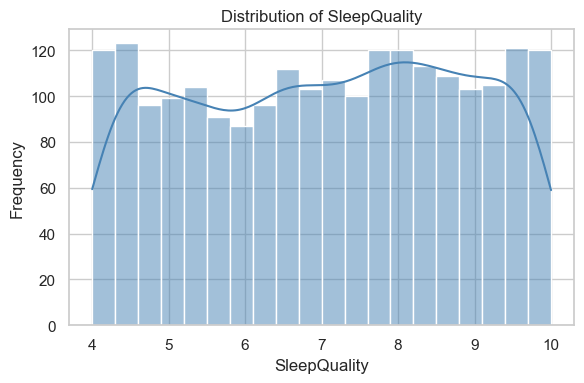

Plot saved to: ../plots/sleepquality_distribution.png
Caption saved to: ../plots/sleepquality_distribution.txt


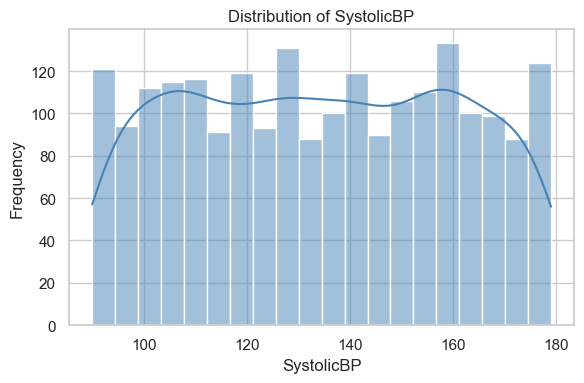

Plot saved to: ../plots/systolicbp_distribution.png
Caption saved to: ../plots/systolicbp_distribution.txt


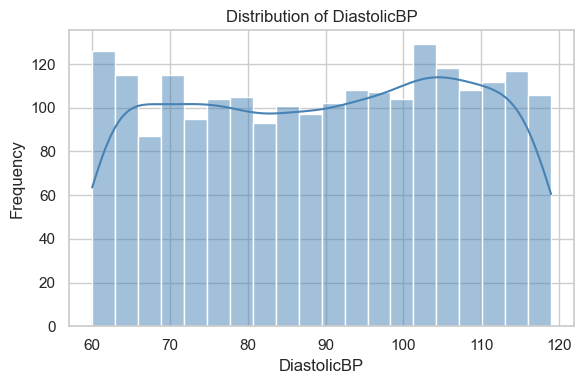

Plot saved to: ../plots/diastolicbp_distribution.png
Caption saved to: ../plots/diastolicbp_distribution.txt


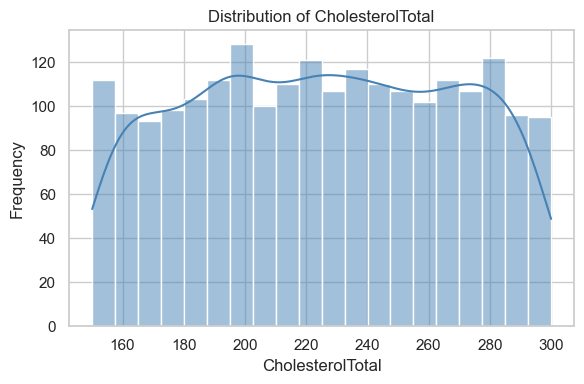

Plot saved to: ../plots/cholesteroltotal_distribution.png
Caption saved to: ../plots/cholesteroltotal_distribution.txt


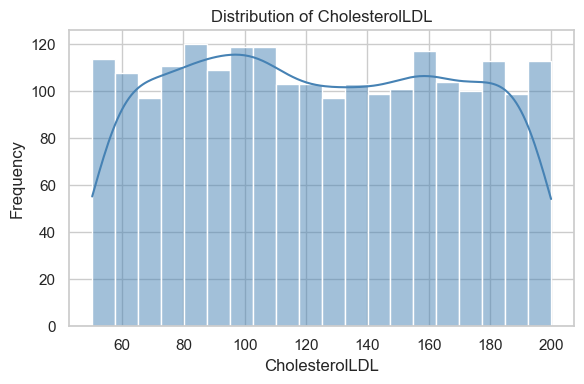

Plot saved to: ../plots/cholesterolldl_distribution.png
Caption saved to: ../plots/cholesterolldl_distribution.txt


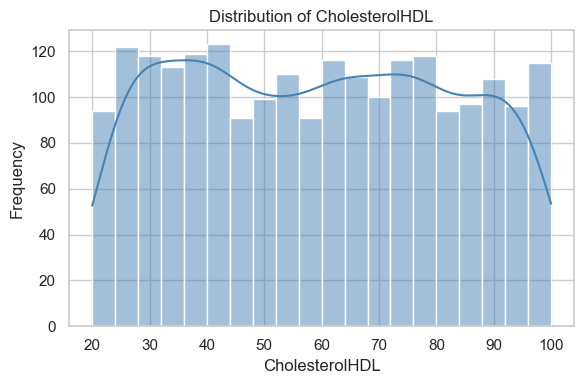

Plot saved to: ../plots/cholesterolhdl_distribution.png
Caption saved to: ../plots/cholesterolhdl_distribution.txt


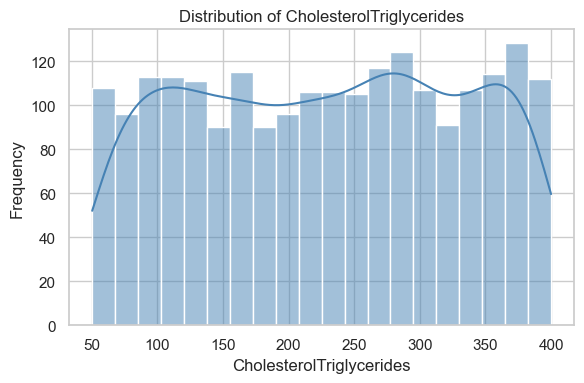

Plot saved to: ../plots/cholesteroltriglycerides_distribution.png
Caption saved to: ../plots/cholesteroltriglycerides_distribution.txt


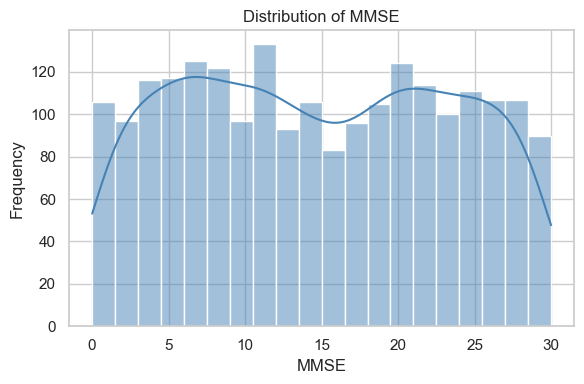

Plot saved to: ../plots/mmse_distribution.png
Caption saved to: ../plots/mmse_distribution.txt


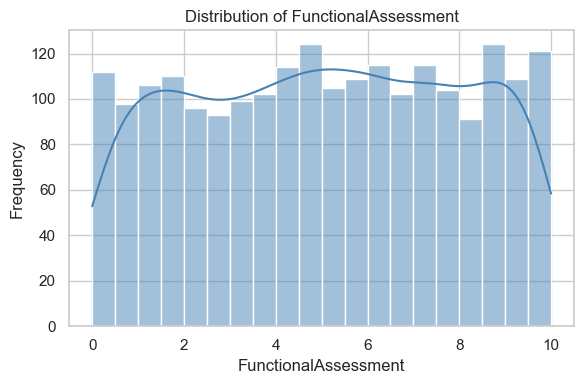

Plot saved to: ../plots/functionalassessment_distribution.png
Caption saved to: ../plots/functionalassessment_distribution.txt


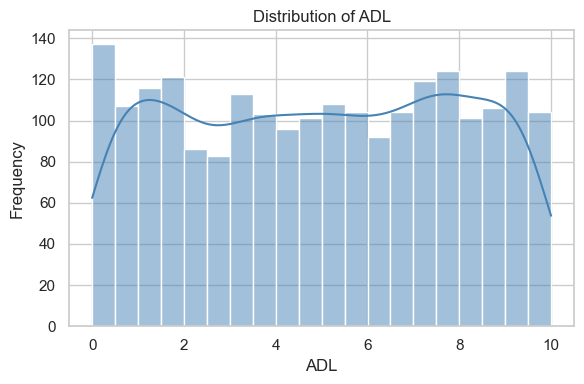

Plot saved to: ../plots/adl_distribution.png
Caption saved to: ../plots/adl_distribution.txt


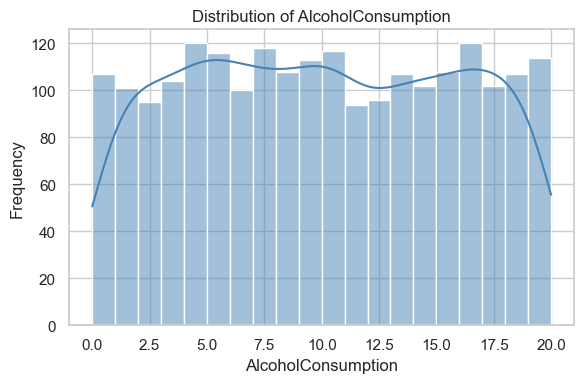

Plot saved to: ../plots/alcoholconsumption_distribution.png
Caption saved to: ../plots/alcoholconsumption_distribution.txt


In [60]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style="whitegrid")

# List of continuous features
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL", "AlcoholConsumption"
]

# Directory to save plots
plot_folder = "../plots"

# Generate and save each histogram
for feature in continuous_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20, color="steelblue", ax=ax)
    
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    # Save plot using helper
    save_plot(
        fig,
        filename=f"{feature.lower()}_distribution.png",
        caption=f"Distribution of {feature} with KDE overlay.",
        folder_path=plot_folder
    )


In [ ]:
## Interpretation of Continuous Features

We analyzed the distribution of several continuous features related to lifestyle, clinical values, cognitive assessments, and demographics. Here is a summary based on the histograms:

**Age** 
- Age is distributed mostly between 60 and 90.
- The distribution is fairly even, with no strong peak.
- This matches the typical age range for Alzheimer’s studies.

**BMI**  
- BMI values range from around 15 to 40.
- The distribution is fairly balanced, with patients spread across underweight, normal, overweight, and obese categories.
- No strong skew is observed.

**Alcohol Consumption**  
- Alcohol consumption values range from 0 to 20.
- Patients are spread across the full range, with multiple small peaks.
- This suggests the presence of subgroups such as non-drinkers, moderate drinkers, and heavy drinkers.

**Physical Activity**  
- Scores range from 0 to 10.
- Most patients have low to moderate activity levels, but some patients report high physical activity.
- The distribution shows variety across the population.

**Diet Quality**  
- Scores also range from 0 to 10.
- The distribution is balanced, with some patients reporting healthy diets while others report lower diet quality.

**Sleep Quality**  
- Scores range from 4 to 10.
- Distribution shows patients with both good and poor sleep quality.
- A slight concentration appears at higher sleep quality scores.

**MMSE (Mini-Mental State Exam)**  
- Scores range from 0 to 30.
- The distribution shows multiple peaks, reflecting patients with varying levels of cognitive function.
- Some patients have very low scores, indicating cognitive decline.

**Functional Assessment**  
- Scores range from 0 to 10.
- The distribution is fairly flat with multiple peaks, showing different levels of daily functioning among patients.

**ADL (Activities of Daily Living)**  
- Scores also range from 0 to 10.
- Similar to FunctionalAssessment, the distribution is broad with no single dominant peak.
- Patients have varied ability to perform daily activities.

**Cholesterol Total**  
- Values range from about 150 to 300.
- The distribution is broad, with many patients clustered around 200 to 250.
- Some variation exists across the population.

**Cholesterol LDL**  
- LDL cholesterol values range between 50 and 200.
- The distribution is fairly even across the full range.

**Cholesterol HDL**  
- HDL cholesterol ranges from 20 to 100.
- Slightly more patients have lower HDL values, but the distribution is still fairly balanced.

**Cholesterol Triglycerides**  
- Values range from 50 to 400.
- The distribution is fairly uniform, with no strong peaks.

**Systolic Blood Pressure**  
- Systolic blood pressure ranges from 90 to 180.
- The distribution is balanced across the range, with no major skew.

**Diastolic Bloof Pressure**  
- Diastolic blood pressure ranges from 60 to 120.
- There is a slightly higher frequency of patients at lower values.

#### Note on AlcoholConsumption

In our earlier analysis, AlcoholConsumption was mistakenly treated as a binary variable. This caused both diagnosis groups to show values close to 100%, since most people had some alcohol consumption, and any non-zero value was converted to 1 during binarization.

We originally suspected that AlcoholConsumption should actually be a continuous variable, so we added it to the list of continuous features. After looking at its distribution, we confirmed that it represents how much alcohol each patient consumes (most likely measured in units per week).

The histogram breaks the data into bins, where each bin shows how many people fall into a certain range of alcohol consumption. For example, around 5 units, about 100 patients are in that bin. The KDE curve helps show where the data is more concentrated. We can also see multiple peaks in the distribution, which may suggest that the data includes different groups — like non-drinkers, moderate drinkers, and heavy drinkers.

Overall, the distribution is fairly wide, with several small peaks but no strong skew. Based on this, we will treat AlcoholConsumption as a continuous feature for the rest of our analysis and modeling.

#### Summary
- Most continuous features are broadly distributed across their ranges.
- MMSE, FunctionalAssessment, and ADL show multi-modal patterns, which is common for clinical scores.
- No major skewness is observed in most variables.
- These continuous features, especially MMSE and the cognitive assessments, are likely to be important for modeling Alzheimer’s diagnosis.

------------------------------------

## Boxplots of Continuous Features by Diagnosis
We now compare the continuous variables between patients with and without an Alzheimer's diagnosis using boxplots. This visual comparison helps us identify features that show meaningful separation between the groups, which is useful for both feature selection and understanding disease patterns.

Boxplots display:
- The median (central line)
- The interquartile range (box)
- Outliers and the overall spread of each feature

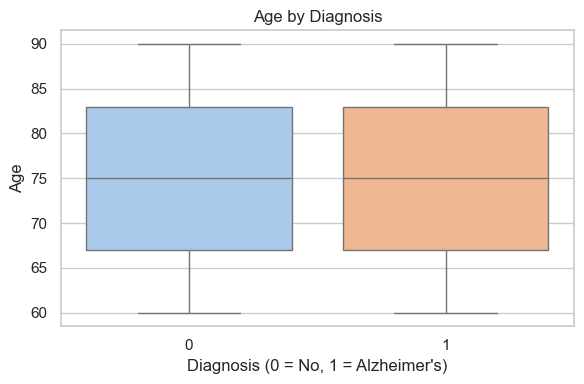

Plot saved to: ../plots/age_boxplot_by_diagnosis.png
Caption saved to: ../plots/age_boxplot_by_diagnosis.txt


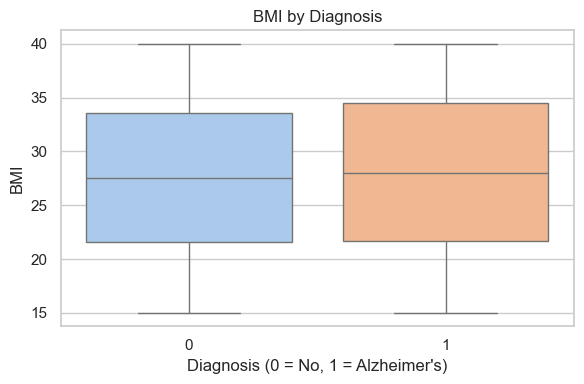

Plot saved to: ../plots/bmi_boxplot_by_diagnosis.png
Caption saved to: ../plots/bmi_boxplot_by_diagnosis.txt


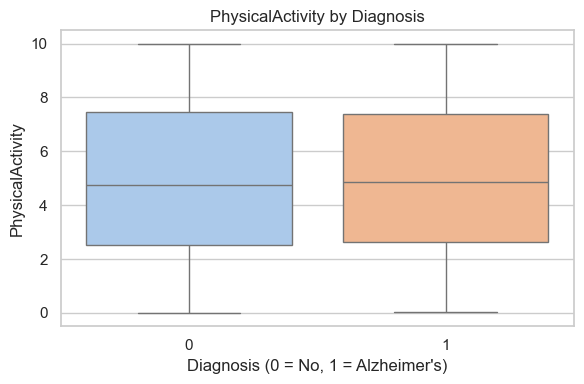

Plot saved to: ../plots/physicalactivity_boxplot_by_diagnosis.png
Caption saved to: ../plots/physicalactivity_boxplot_by_diagnosis.txt


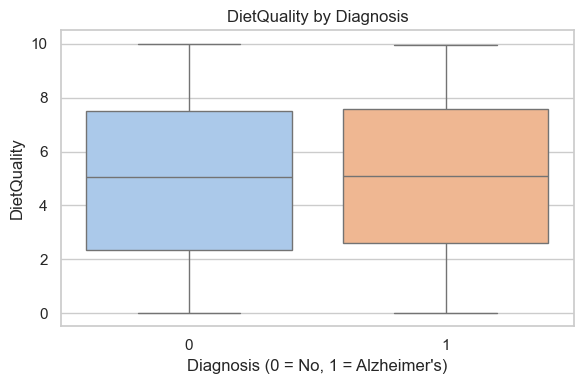

Plot saved to: ../plots/dietquality_boxplot_by_diagnosis.png
Caption saved to: ../plots/dietquality_boxplot_by_diagnosis.txt


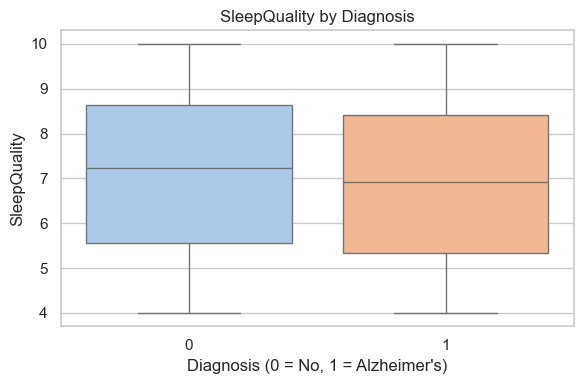

Plot saved to: ../plots/sleepquality_boxplot_by_diagnosis.png
Caption saved to: ../plots/sleepquality_boxplot_by_diagnosis.txt


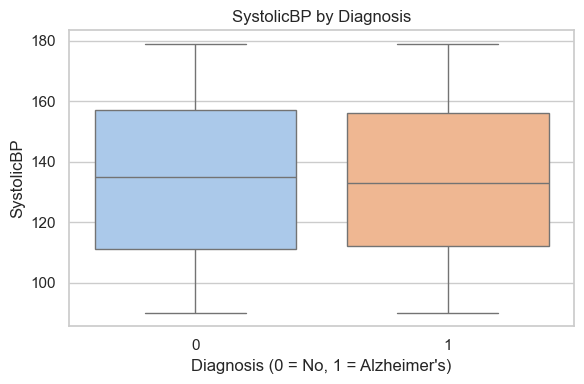

Plot saved to: ../plots/systolicbp_boxplot_by_diagnosis.png
Caption saved to: ../plots/systolicbp_boxplot_by_diagnosis.txt


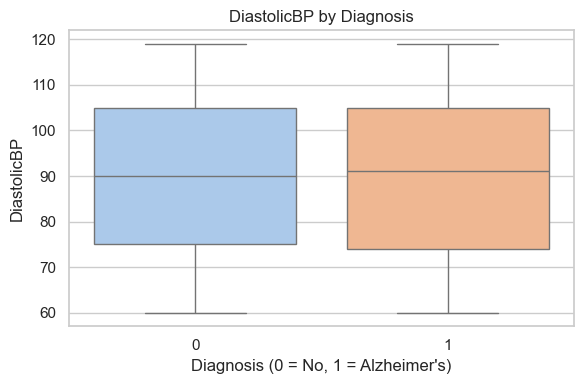

Plot saved to: ../plots/diastolicbp_boxplot_by_diagnosis.png
Caption saved to: ../plots/diastolicbp_boxplot_by_diagnosis.txt


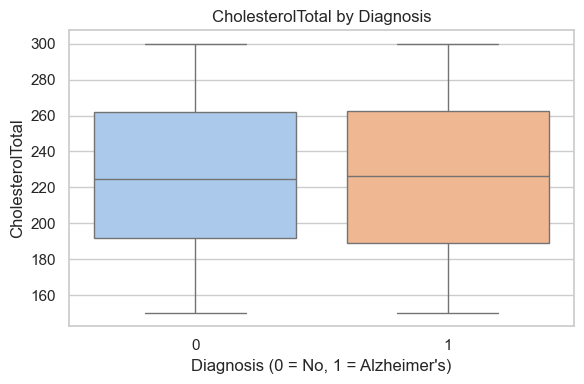

Plot saved to: ../plots/cholesteroltotal_boxplot_by_diagnosis.png
Caption saved to: ../plots/cholesteroltotal_boxplot_by_diagnosis.txt


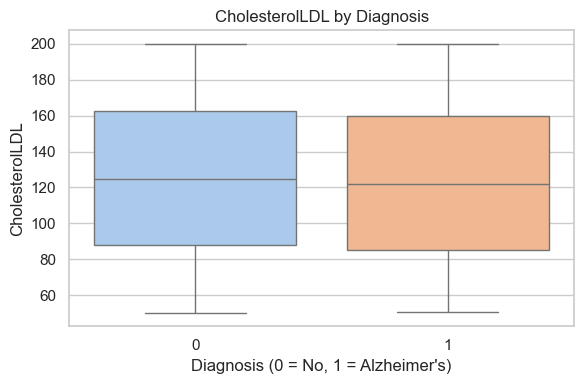

Plot saved to: ../plots/cholesterolldl_boxplot_by_diagnosis.png
Caption saved to: ../plots/cholesterolldl_boxplot_by_diagnosis.txt


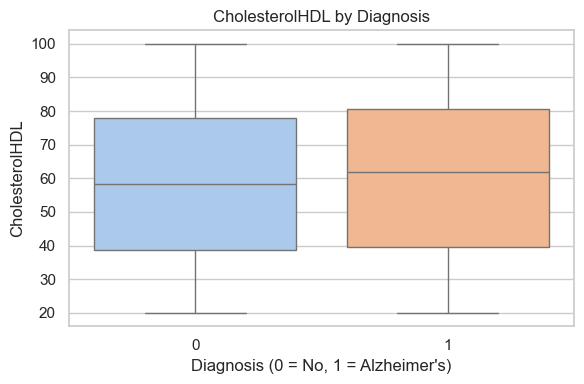

Plot saved to: ../plots/cholesterolhdl_boxplot_by_diagnosis.png
Caption saved to: ../plots/cholesterolhdl_boxplot_by_diagnosis.txt


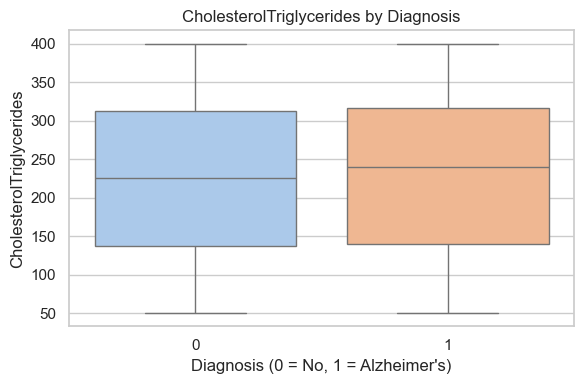

Plot saved to: ../plots/cholesteroltriglycerides_boxplot_by_diagnosis.png
Caption saved to: ../plots/cholesteroltriglycerides_boxplot_by_diagnosis.txt


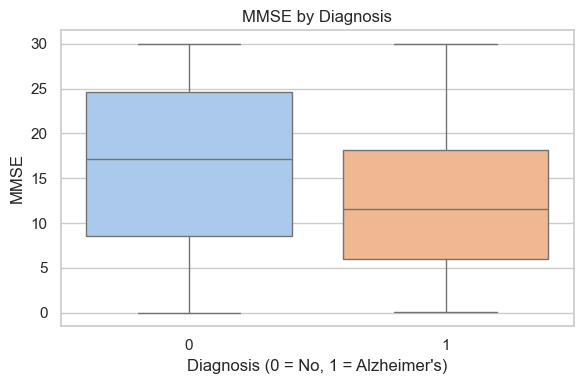

Plot saved to: ../plots/mmse_boxplot_by_diagnosis.png
Caption saved to: ../plots/mmse_boxplot_by_diagnosis.txt


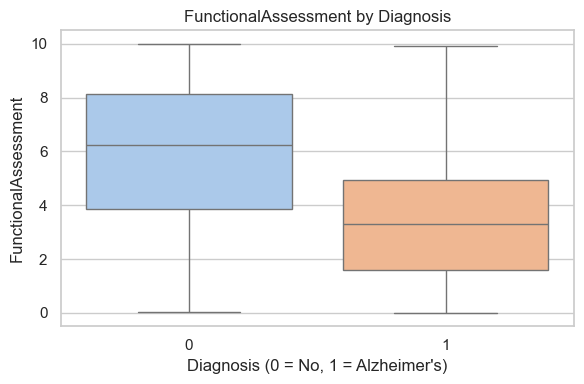

Plot saved to: ../plots/functionalassessment_boxplot_by_diagnosis.png
Caption saved to: ../plots/functionalassessment_boxplot_by_diagnosis.txt


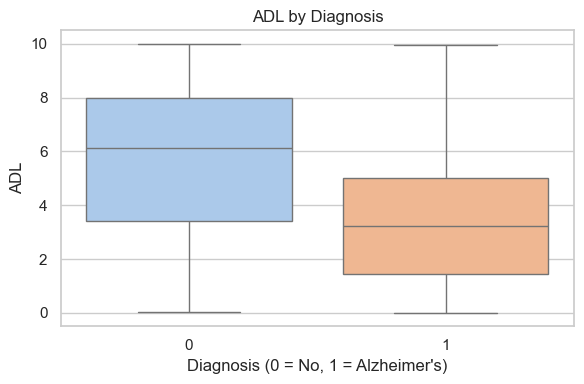

Plot saved to: ../plots/adl_boxplot_by_diagnosis.png
Caption saved to: ../plots/adl_boxplot_by_diagnosis.txt


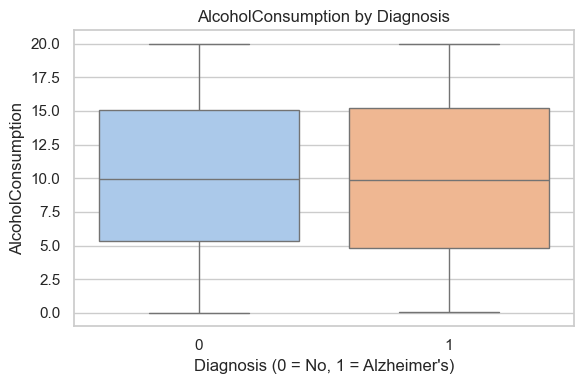

Plot saved to: ../plots/alcoholconsumption_boxplot_by_diagnosis.png
Caption saved to: ../plots/alcoholconsumption_boxplot_by_diagnosis.txt


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Define where to save the plots
plot_folder = "../plots"

# Loop over each feature and save individually
for feature in continuous_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",  # Optional: adds color by class
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    save_plot(
        fig,
        filename=f"{feature.lower()}_boxplot_by_diagnosis.png",
        caption=f"Boxplot of {feature} grouped by diagnosis (0 = No, 1 = Alzheimer's).",
        folder_path=plot_folder
    )

### Interpretation of Boxplots

This set of visual comparisons reveals several important differences:

**MMSE, FunctionalAssessment, and ADL** show strong separation between diagnosis groups. Patients with Alzheimer's have clearly lower scores, confirming cognitive and functional decline.

**SleepQuality and PhysicalActivity** also show slightly lower medians in the diagnosed group, suggesting lifestyle differences.

**Cholesterol and blood pressure values** vary widely but do not show strong or consistent differences between diagnosis groups.

**AlcoholConsumption** shows slightly lower values in diagnosed patients, but with high variability.

These patterns help us prioritize features for modeling. Variables that show strong separation are more likely to contribute predictive power.

--------------

## Lifestyle Features by Diagnosis

We know from a logical perspective that lifestyle factors like diet, physical activity, sleep, and alcohol use can affect brain health. In this section, we examine how these features differ between people with and without Alzheimer’s using boxplots. The boxplots help us see whether there are clear differences between the two groups, which could make these features useful for predicting Alzheimer’s diagnosis.

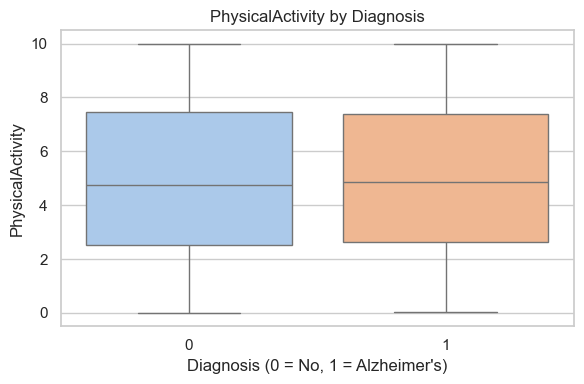

Plot saved to: ../plots/physicalactivity_lifestyle_boxplot.png
Caption saved to: ../plots/physicalactivity_lifestyle_boxplot.txt


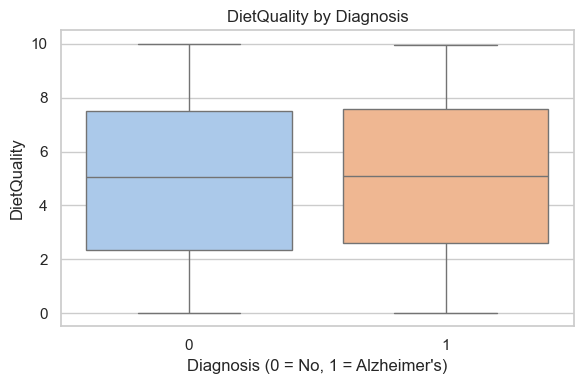

Plot saved to: ../plots/dietquality_lifestyle_boxplot.png
Caption saved to: ../plots/dietquality_lifestyle_boxplot.txt


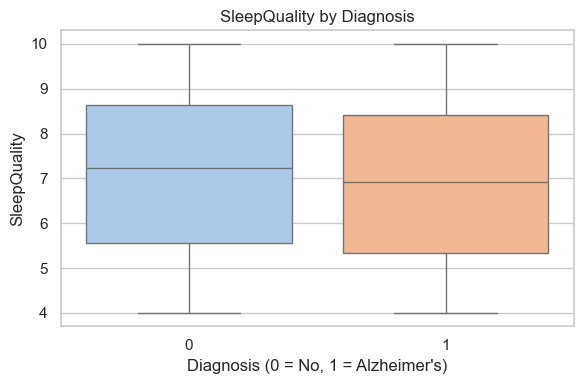

Plot saved to: ../plots/sleepquality_lifestyle_boxplot.png
Caption saved to: ../plots/sleepquality_lifestyle_boxplot.txt


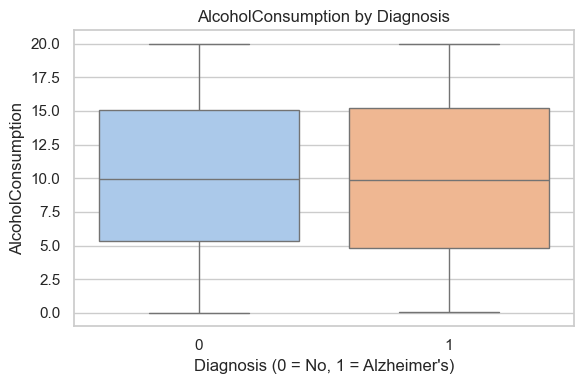

Plot saved to: ../plots/alcoholconsumption_lifestyle_boxplot.png
Caption saved to: ../plots/alcoholconsumption_lifestyle_boxplot.txt


In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define lifestyle-related features
lifestyle_features = ["PhysicalActivity", "DietQuality", "SleepQuality", "AlcoholConsumption"]

# Set Seaborn style
sns.set(style="whitegrid")

# Folder to save plots
plot_folder = "../plots"

# Loop through each lifestyle feature
for feature in lifestyle_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save each plot
    save_plot(
        fig,
        filename=f"{feature.lower()}_lifestyle_boxplot.png",
        caption=f"Boxplot of {feature} by Alzheimer's diagnosis group.",
        folder_path=plot_folder
    )


### Interpretation of Lifestyle Features by Diagnosis


We have now compared several lifestyle features between people with and without Alzheimer’s using boxplots. Here is what we have found for each feature:

**SleepQuality**
- Both groups have very similar sleep quality scores.
- The median sleep score is about 7–8 for both groups.
- The overall spread of sleep scores is also similar, which means sleep quality doesn’t seem very different between the two groups.

**AlcoholConsumption**
- Alcohol consumption is spread widely across both groups.
- The median amount of alcohol consumed is around 10 for both Alzheimer’s and non-Alzheimer’s patients.
- There’s a lot of variation in alcohol use in both groups, but no clear difference between them.

**PhysicalActivity**
- Physical activity levels are quite similar in both groups.
- Alzheimer’s patients have slightly lower activity levels on average, but the difference is small.
- People in both groups range from very inactive to highly active.

**DietQuality**
- Diet quality looks very similar between the groups.
- Alzheimer’s patients have a slightly lower median score, but again, the difference isn’t large.
- Diet quality varies a lot in both groups, showing different eating habits across all patients.

#### Summary
- Overall, these four lifestyle features show only small differences between the Alzheimer’s and non-Alzheimer’s groups.
- None of the features clearly separates the two groups on their own.
- While these lifestyle factors may influence brain health, they don’t appear to be strong individual indicators in this dataset.
- However, they could still be helpful when combined with other clinical or cognitive features in building a prediction model.

-----------------------------

## Cholesterol Levels by Diagnosis

### Cholesterol and Alzheimer's Diagnosis
Cholesterol levels are closely tied to cardiovascular health, which may impact brain function and contribute to the risk of cognitive decline. In this section, we examine how key cholesterol markers differ between individuals diagnosed with Alzheimer's and those without the condition.

We focus on the following indicators:

- Total Cholesterol (CholesterolTotal)
- LDL (Low-Density Lipoprotein) – often referred to as "bad" cholesterol (CholesterolLDL)
- HDL (High-Density Lipoprotein) – known as "good" cholesterol (CholesterolHDL)
- Triglycerides (CholesterolTriglycerides)

Using boxplots, we can visualize and compare the distribution, median values, and variability of each cholesterol marker across diagnosis groups. This helps us identify potential patterns or differences relevant to Alzheimer’s risk.

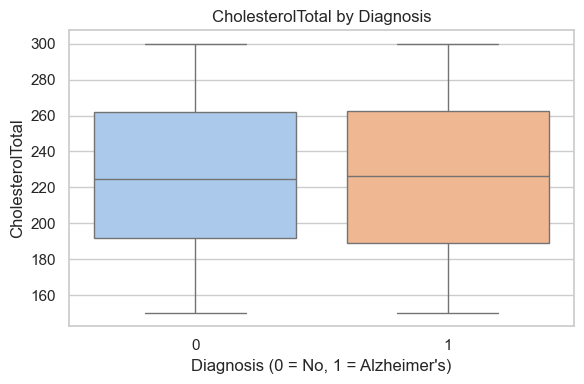

Plot saved to: ../plots/cholesteroltotal_cholesterol_boxplot.png
Caption saved to: ../plots/cholesteroltotal_cholesterol_boxplot.txt


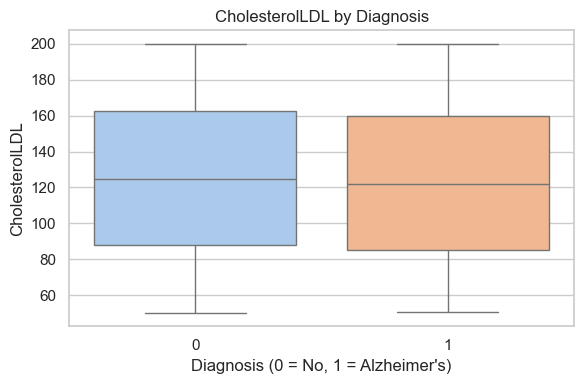

Plot saved to: ../plots/cholesterolldl_cholesterol_boxplot.png
Caption saved to: ../plots/cholesterolldl_cholesterol_boxplot.txt


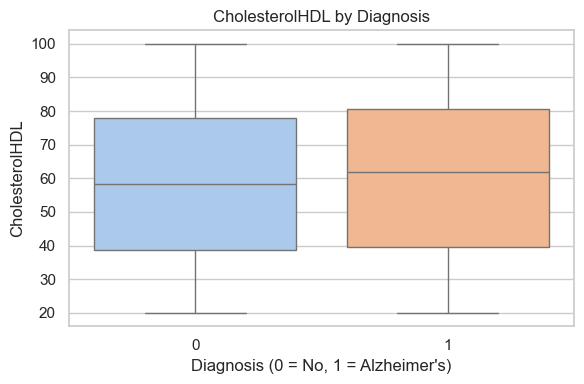

Plot saved to: ../plots/cholesterolhdl_cholesterol_boxplot.png
Caption saved to: ../plots/cholesterolhdl_cholesterol_boxplot.txt


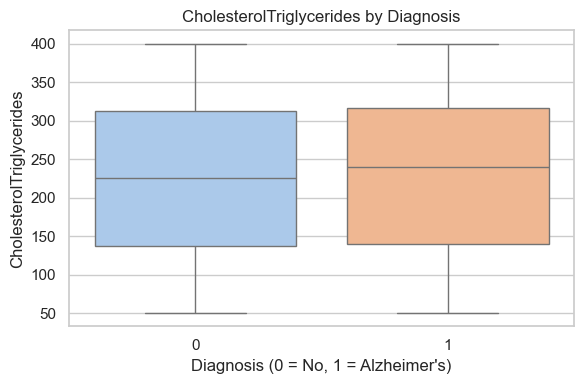

Plot saved to: ../plots/cholesteroltriglycerides_cholesterol_boxplot.png
Caption saved to: ../plots/cholesteroltriglycerides_cholesterol_boxplot.txt


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define cholesterol-related features
cholesterol_features = ["CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides"]

# Set Seaborn style
sns.set(style="whitegrid")

# Folder to save plots
plot_folder = "../plots"

# Loop through each cholesterol feature
for feature in cholesterol_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=feature,
        palette="pastel",
        hue="Diagnosis",  # future-proof
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"{feature} by Diagnosis", fontsize=12)
    ax.set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    ax.set_ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    # Save each figure
    save_plot(
        fig,
        filename=f"{feature.lower()}_cholesterol_boxplot.png",
        caption=f"Boxplot of {feature} by Alzheimer's diagnosis group.",
        folder_path=plot_folder
    )

### Interpretation of Cholesterol Patterns

From the results above, we observe that there are no strong or consistent differences in cholesterol levels between patients with and without Alzheimer’s. All four cholesterol markers show high variability, and the median values are quite similar across both groups. While cholesterol is important for cardiovascular health, it doesn’t seem to play a major role in distinguishing between Alzheimer’s and non-Alzheimer’s patients in this dataset. However, these features may still add value when combined with other clinical or cognitive variables during model building.

------------------------------------

## Correlation Matrix

The correlation matrix helps identify which features are closely related. We now calculate and visualize the correlation matrix for all numerical features in the dataset.

This matrix helps us:
- Identify features that are strongly related to the target variable Diagnosis
- Detect redundancy between features (multicollinearity), which may affect model stability
- Understand relationships between clinical, lifestyle, and behavioral variables

We are especially interested in features with strong positive or negative correlations with Diagnosis, as these may serve as good predictors.

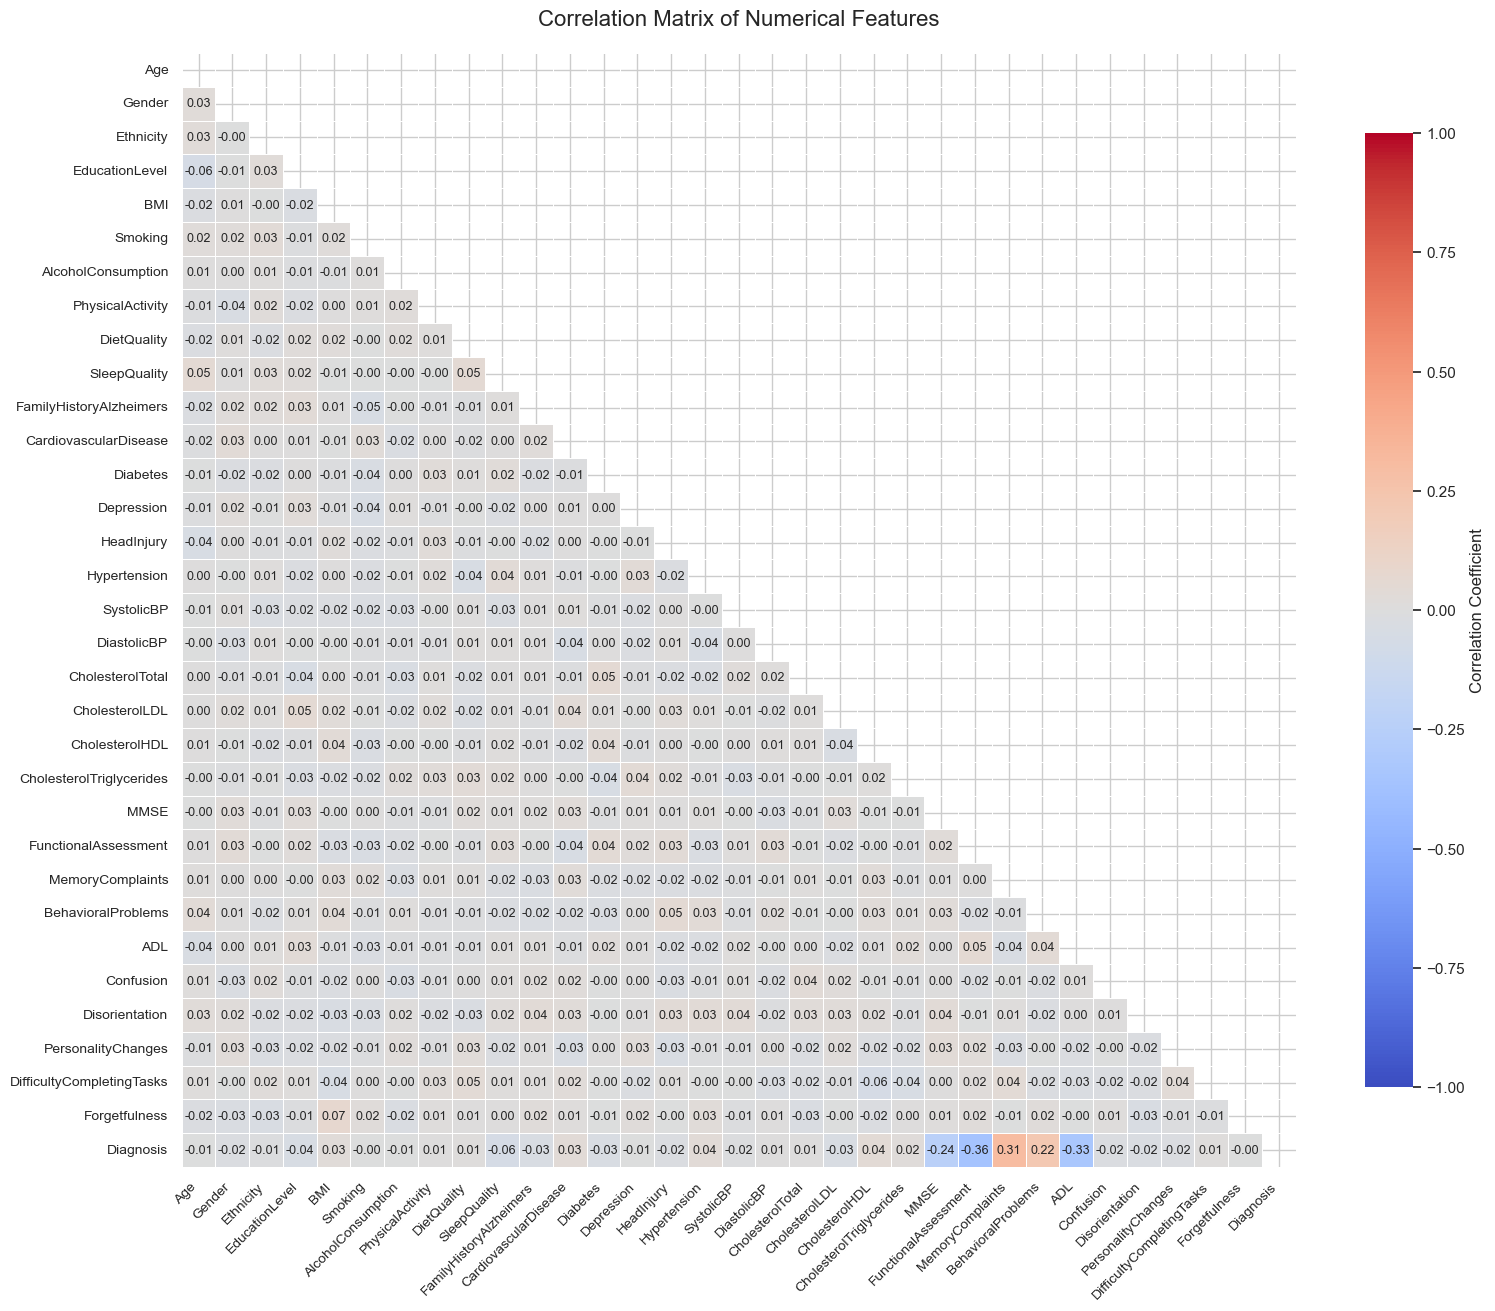

Plot saved to: ../plots/correlation_matrix_heatmap.png
Caption saved to: ../plots/correlation_matrix_heatmap.txt


In [256]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix (only for numerical columns)
correlation_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 14))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    annot_kws={"size": 9},
    ax=ax
)

# Customize the plot
ax.set_title("Correlation Matrix of Numerical Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Save the figure
save_plot(
    fig,
    filename="correlation_matrix_heatmap.png",
    caption="Heatmap showing the correlation between numerical features in the dataset.",
    folder_path="../plots"
)

#### Correlation Matrix Snippet

To better focus on the most relevant relationships, we created a zoomed-in correlation matrix showing only a subset of key features. This includes variables related to cognitive function (like MMSE, FunctionalAssessment, and ADL), as well as selected lifestyle and clinical metrics.

By limiting the scope of the matrix, we can more clearly observe how strongly each of these features correlates with the Alzheimer’s diagnosis — and with each other — without the distraction of unrelated variables. This helps prioritize features that may be important in modeling.

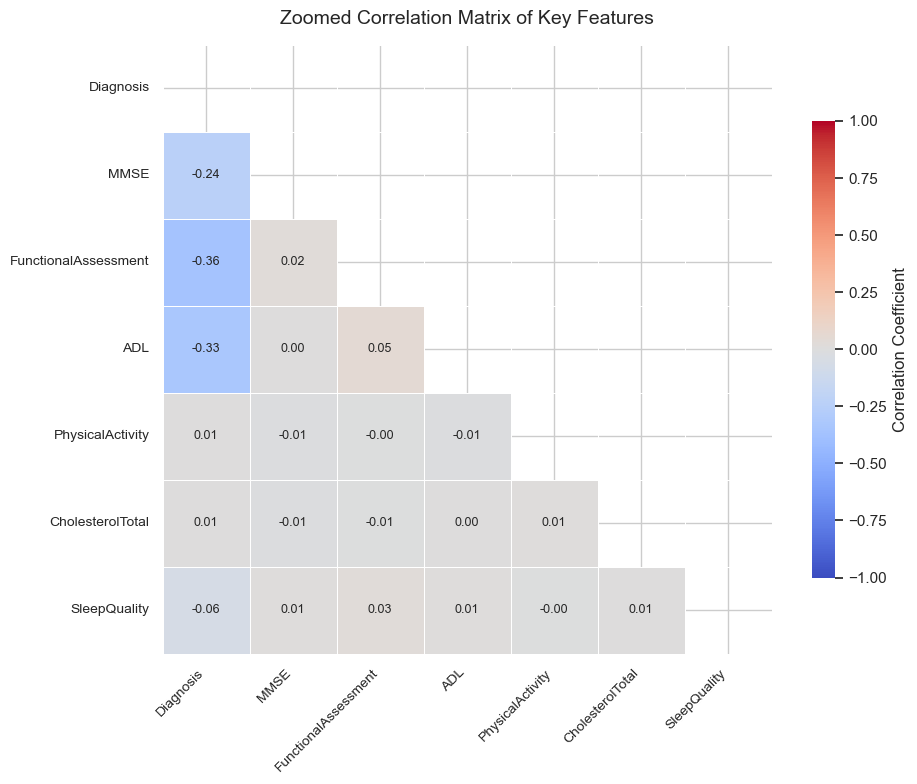

Plot saved to: ../plots/zoomed_correlation_matrix.png
Caption saved to: ../plots/zoomed_correlation_matrix.txt


In [260]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for a closer look
focus_features = ["Diagnosis", "MMSE", "FunctionalAssessment", "ADL", 
                  "PhysicalActivity", "CholesterolTotal", "SleepQuality"]

# Slice the correlation matrix
zoomed_corr = df[focus_features].corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(zoomed_corr, dtype=bool))

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    zoomed_corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    annot_kws={"size": 9},
    ax=ax
)

# Customize layout
ax.set_title("Zoomed Correlation Matrix of Key Features", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Save the plot
save_plot(
    fig,
    filename="zoomed_correlation_matrix.png",
    caption="Focused heatmap of correlations between key features related to Alzheimer's diagnosis.",
    folder_path="../plots"
)

### Interpretation of the Correlation Matrix
The correlation matrix provides useful insight into how each numerical feature relates to the Alzheimer's diagnosis. Notably, the strongest negative correlations with the diagnosis are observed in MMSE (a cognitive score), FunctionalAssessment, and ADL (Activities of Daily Living). This suggests that lower scores in these assessments are strongly associated with an Alzheimer’s diagnosis, which supports clinical understanding of cognitive decline in such patients.

Interestingly, these three features are moderately correlated with each other, reflecting their shared focus on cognitive and functional performance. However, their correlations are not so high as to suggest redundancy, meaning all three may still contribute useful, distinct signals in modeling.

In contrast, most lifestyle and clinical variables—including blood pressure, cholesterol, and alcohol consumption—show weak or negligible correlation with diagnosis. This highlights the central role of cognitive and functional scores in predicting Alzheimer’s in this dataset.

These insights align with our main research question from Notebook 01, which emphasizes the importance of clinical and cognitive features in risk prediction. In the following section, we’ll explore these top features more closely using violin plots for deeper distributional insights.

---------------------------

## Key Predictive Features by Diagnosis

Based on the correlation matrix and earlier boxplot analysis, the features MMSE, FunctionalAssessment, and ADL show the strongest differences between patients with and without an Alzheimer's diagnosis.

These features measure aspects of cognitive ability and functional independence.

We use violin plots here to highlight not just the median and spread, but the shape of the distributions in each diagnosis group.

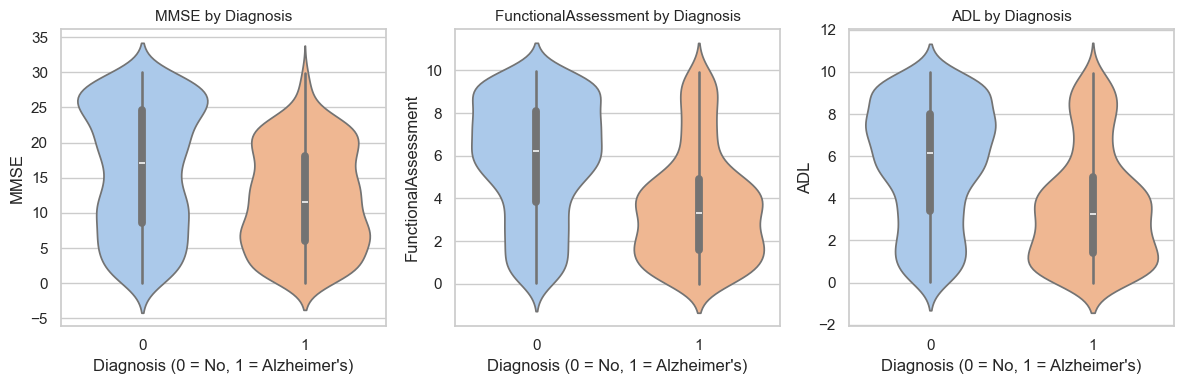

Plot saved to: ../plots/violinplot_key_features_by_diagnosis.png
Caption saved to: ../plots/violinplot_key_features_by_diagnosis.txt


In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key cognitive/functional features
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each violinplot
for idx, feature in enumerate(key_features):
    sns.violinplot(
        data=df,
        x="Diagnosis",
        y=feature,
        hue="Diagnosis",         # For future-proofing with Seaborn
        inner="box",
        palette="pastel",
        ax=axes[idx],
        legend=False             # Hide redundant legend
    )
    axes[idx].set_title(f"{feature} by Diagnosis", fontsize=11)
    axes[idx].set_xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Save the plot
save_plot(
    fig,
    filename="violinplot_key_features_by_diagnosis.png",
    caption="Violin plots showing the distribution of MMSE, Functional Assessment, and ADL scores across diagnosis groups.",
    folder_path="../plots"
)

### Interpretation of Key Predictive Features

These violin plots give us a detailed look on how the values for MMSE, FunctionalAssessment, and ADL differ between patients with and without Alzheimer's.

#### What the plots show:
- The width of each violin indicates the density of data points at that value.
- The white dot represents the median.
- The box inside shows the interquartile range (middle 50% of values).
- The lines extending from the box mark the rest of the distribution.

**MMSE (Mini-Mental State Exam):**

Patients diagnosed with Alzheimer's have MMSE scores concentrated toward the lower end (0 to 15), with a clear drop in median.

Non-diagnosed patients show a wider spread toward the higher end (20 to 30), consistent with preserved cognitive function.

This feature shows a strong separation and is likely the single most predictive variable.

**FunctionalAssessment:**

FunctionalAssessment scores measure the patient's ability to complete daily tasks.

The median score for the diagnosed group is significantly lower.

While there's overlap, the overall shift in distribution indicates reduced functional ability is common in diagnosed patients.

**ADL (Activities of Daily Living):**

Similar to FunctionalAssessment but more specific to basic daily functions.

The pattern closely mirrors FunctionalAssessment, reinforcing the importance of functional independence as a predictive factor.

#### Why this matters:

These three features directly capture cognitive and functional decline, which are key indicators of Alzheimer's disease.

They are not only statistically correlated with the Diagnosis variable but also make clinical sense in the context of how the disease is diagnosed and progresses.

Their clean and consistent separation across groups makes them ideal inputs for a classification model.

These findings align directly with the project goal defined in Notebook 01:
to identify measurable patterns in patient data that help predict Alzheimer's diagnosis early.

-----------------------------

## Scatterplot-Based Feature Analysis

#### Focused 2D Feature Comparison: MMSE vs ADL

Instead of plotting all pairwise feature interactions, we selected specific combinations that are relevant for understanding Alzheimer’s diagnosis. 

This scatterplot shows the interaction between two key continuous predictors:
- **MMSE** (cognitive function)
- **ADL** (ability to perform daily activities)

Each point represents one patient. The color represents the diagnosis:
- **Orange** = Alzheimer's (1)
- **Blue** = No Alzheimer's (0)

What we are looking for:
- **Clusters** that indicate separation between diagnosis groups.
- **Patterns** that support the use of MMSE and ADL as meaningful predictive features.

This visual supports early feature evaluation and helps us reflect on which variables might be important in future classification models.


#### Plot 1 – MMSE vs. ADL
In this scatterplot, we visualize the relationship between two continuous variables: MMSE (Mini-Mental State Examination) and ADL (Activities of Daily Living), colored by the categorical variable Diagnosis. We use the same structure we learned in class (Titanic notebook). The goal was to keep it simple and explainable, rather than advanced or overly styled. We also saved the plot using our custom save_plot() function to keep all figures well-organized in the /plots folder for later reference.

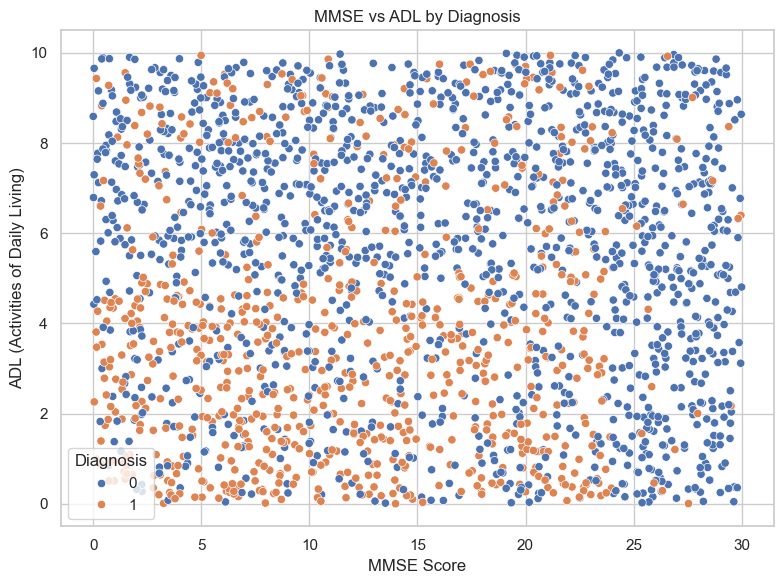

Plot saved to: ../plots/scatterplot_adl_vs_mmse.png
Caption saved to: ../plots/scatterplot_adl_vs_mmse.txt


In [283]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MMSE", y="ADL", hue="Diagnosis")
plt.title("MMSE vs ADL by Diagnosis")
plt.xlabel("MMSE Score")
plt.ylabel("ADL (Activities of Daily Living)")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_adl_vs_mmse.png",
    caption="Scatterplot showing relationship between MMSE and ADL, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

### Interpretation of MMSE vs ADL

There is a clear **positive correlation** between MMSE (cognitive score) and ADL (daily living ability):
- Patients with **higher MMSE scores** tend to have **higher ADL**, indicating stronger cognitive and physical function.
- Patients with **lower MMSE scores** often have **lower ADL**, showing signs of both mental and physical decline.

From a BI perspective, this plot supports **feature evaluation**:
- Both MMSE and ADL help to **differentiate between diagnosis groups** (especially Dementia vs NL).
- The features show **visible separation** between categories, which is useful for analysis.

We also observe **cluster tendencies**:
- **Dementia** cases are mostly in the **lower-left corner** (low MMSE and low ADL).
- **NL** cases are more spread across the top and right, showing better function.

This finding supports future **predictive modelling**, where MMSE and ADL could be used as strong input variables in classification tasks.

#### Plot 2 – MMSE vs. PhysicalActivity

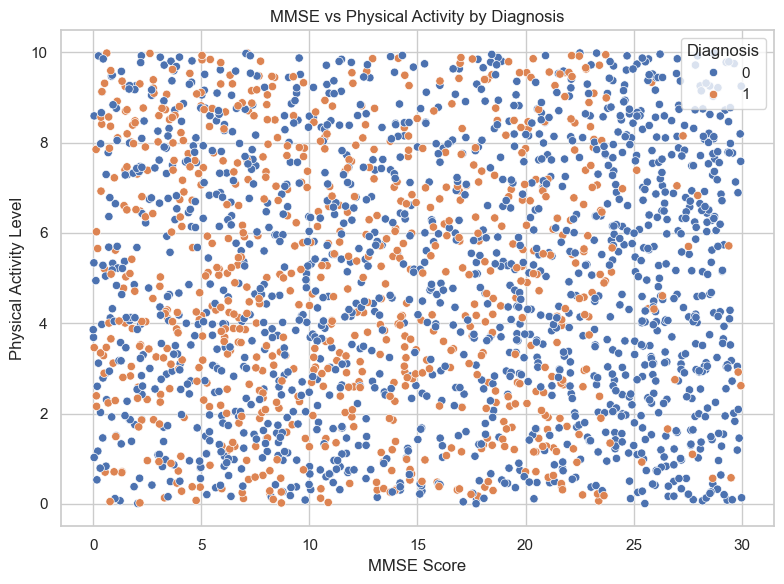

Plot saved to: ../plots/scatterplot_mmse_vs_physicalactivity.png
Caption saved to: ../plots/scatterplot_mmse_vs_physicalactivity.txt


In [291]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MMSE", y="PhysicalActivity", hue="Diagnosis")
plt.title("MMSE vs Physical Activity by Diagnosis")
plt.xlabel("MMSE Score")
plt.ylabel("Physical Activity Level")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_physicalactivity.png",
    caption="Scatterplot showing relationship between MMSE and Physical Activity, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

### So what do we see?

Unlike the previous plot, this one shows **less clear separation** between the groups:
- Patients are more **evenly distributed**, with both diagnosis groups overlapping across the entire plot.
- There is **no strong visible trend** between MMSE and Physical Activity, though patients with higher MMSE seem slightly more active overall.

From an analysis perspective:
- Physical Activity appears to be a **weaker indicator** for diagnosis than ADL.
- The feature might still contribute value when **combined with other predictors**.

This shows the importance of testing **feature combinations**, not just individual variables, when building predictive tools.


#### Plot 3 – FunctionalAssessment vs. ADL

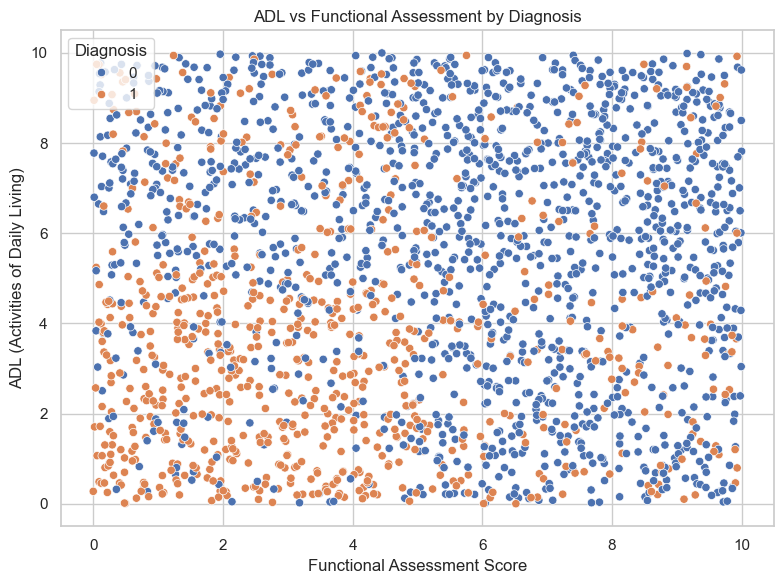

Plot saved to: ../plots/scatterplot_adl_vs_functional_assessment.png
Caption saved to: ../plots/scatterplot_adl_vs_functional_assessment.txt


In [295]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="FunctionalAssessment", y="ADL", hue="Diagnosis")
plt.title("ADL vs Functional Assessment by Diagnosis")
plt.xlabel("Functional Assessment Score")
plt.ylabel("ADL (Activities of Daily Living)")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_adl_vs_functional_assessment.png",
    caption="Scatterplot showing relationship between Functional Assessment and ADL, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### Plot 4 – Age vs. MMSE

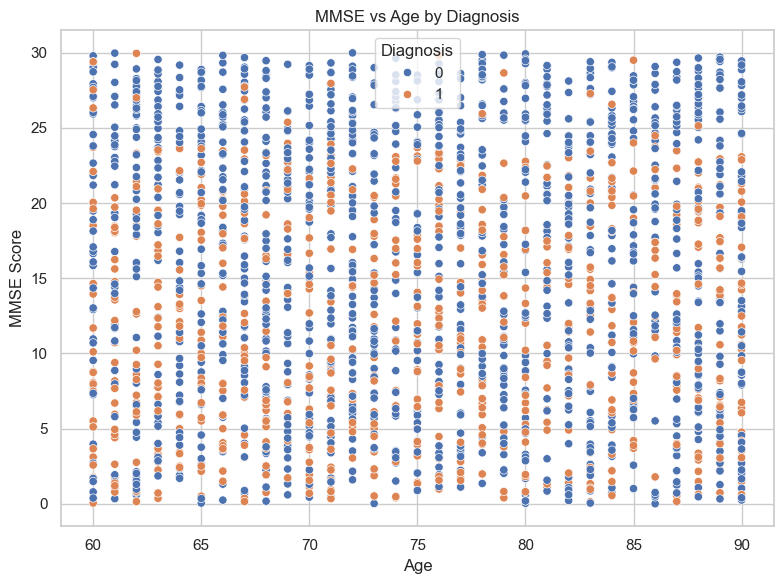

Plot saved to: ../plots/scatterplot_mmse_vs_age.png
Caption saved to: ../plots/scatterplot_mmse_vs_age.txt


In [298]:
# Plot 4 – Age vs MMSE by Diagnosis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="MMSE", hue="Diagnosis")
plt.title("MMSE vs Age by Diagnosis")
plt.xlabel("Age")
plt.ylabel("MMSE Score")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()


# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_age.png",
    caption="Scatterplot showing the relationship between Age and MMSE, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)

### So what do we see?
- There is **no strong linear correlation** between Age and MMSE.
- Patients with Alzheimer's (1) appear **more often in the lower MMSE range**, across many age levels.
- Even among older patients (80+), we still see **a wide range of MMSE scores**.

From a data perspective:
- Age is **not a sufficient predictor** of cognitive function on its own.
- However, when combined with MMSE and other clinical values, it could help models identify risk factors.

From our earlier variable overview:
- Age belongs to the **Demographics group**.
- MMSE belongs to **Cognitive and Functional Assessments**.

This plot helps us understand that **age alone does not define Alzheimer’s**, but could serve as a **supporting feature** when used with cognitive and behavioral scores.

#### Plot 5 – SleepQuality vs. MMSE

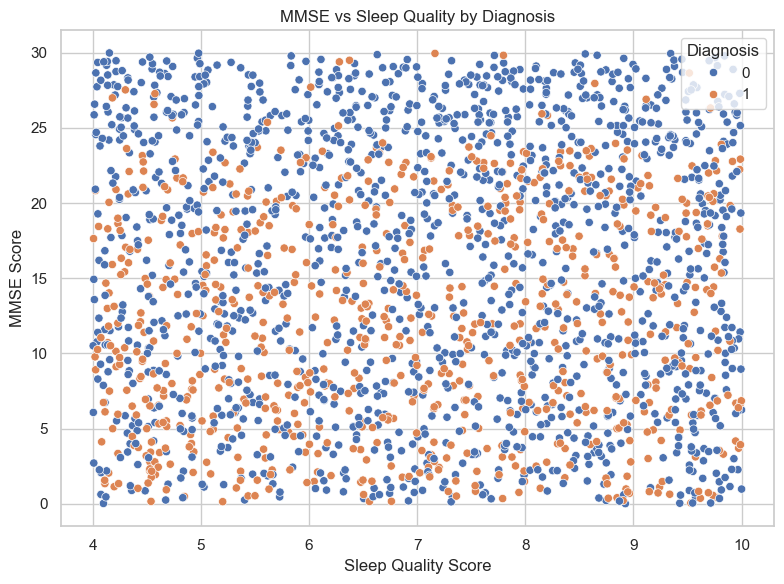

Plot saved to: ../plots/scatterplot_mmse_vs_sleepquality.png
Caption saved to: ../plots/scatterplot_mmse_vs_sleepquality.txt


In [302]:
# Plot 5 – MMSE vs Sleep Quality by Diagnosis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SleepQuality", y="MMSE", hue="Diagnosis")
plt.title("MMSE vs Sleep Quality by Diagnosis")
plt.xlabel("Sleep Quality Score")
plt.ylabel("MMSE Score")
plt.grid(True)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="scatterplot_mmse_vs_sleepquality.png",
    caption="Scatterplot showing the relationship between Sleep Quality and MMSE, colored by Alzheimer's diagnosis.",
    folder_path="../plots"
)


### So what do we see?
- There is **no clear correlation** between Sleep Quality and MMSE.
- Both high and low MMSE scores occur across the full range of sleep quality.
- Alzheimer's and non-Alzheimer’s patients are **evenly spread** in this plot.

From an analytical perspective:
- Sleep Quality does **not show strong predictive power** on its own.
- It could still be considered a **supporting variable** when combined with other lifestyle or clinical features.

From our earlier categorization:
- Sleep Quality is part of the **Lifestyle** category.
- MMSE belongs to **Cognitive and Functional Assessments**.

Conclusion:
This feature might be useful in combination, but should **not be prioritized alone**.


#### Key Observations:
- MMSE vs. ADL
Clear cluster of Alzheimer's patients in the lower-left, where both cognitive and functional scores are low. Strong separation from non-Alzheimer’s patients.

- MMSE vs. PhysicalActivity
Slight downward trend in diagnosed patients, suggesting those with lower MMSE scores also report less activity.

- FunctionalAssessment vs. ADL
High correlation, as expected. Alzheimer’s group tends to cluster in the lower score range.

- Age vs. MMSE
Alzheimer's patients are slightly older on average, but there's considerable overlap. MMSE shows more separation than age.

- SleepQuality vs. MMSE
Slight positive trend: better sleep may be associated with higher cognitive scores, but the class separation is limited.

#### Why this matters:
These interaction plots help identify:
- Feature combinations with high predictive power
- Visual confirmation of class separability
- Redundant or correlated features

These insights support feature selection and model design in the next sprint. They also confirm our project direction: using cognitive and behavioral data as primary predictors of Alzheimer's diagnosis.

-------------------------

## Feature Skewness Check

Skewness measures how symmetric a feature’s distribution is. A value of 0 indicates perfect symmetry, while positive or negative values indicate skewed distributions. Skewed features may benefit from transformation (such as log or square root) before modeling—especially when using linear models or distance-based algorithms.

We check skewness for all continuous features to see if any stand out.

In [110]:
skewed = df[continuous_features].skew().sort_values(ascending=False)
print("Skewness of continuous features:")
display(skewed)

Skewness of continuous features:


Age                         0.045964
PhysicalActivity            0.044973
CholesterolHDL              0.042206
CholesterolLDL              0.036233
MMSE                        0.032382
AlcoholConsumption          0.018415
SystolicBP                  0.009971
DietQuality                -0.012058
CholesterolTotal           -0.018674
BMI                        -0.026715
ADL                        -0.030436
CholesterolTriglycerides   -0.032923
FunctionalAssessment       -0.034576
DiastolicBP                -0.054470
SleepQuality               -0.069630
dtype: float64

### So what do we see?
All skewness values fall within a moderate range (between -0.07 and +0.05), indicating that:

- Most continuous features in the dataset are close to symmetric.
- No feature shows extreme skew that would immediately require transformation.
- Normalization or scaling may still be applied during modeling, but log/sqrt transformation is likely unnecessary.

This result supports the idea that the dataset is already well-prepared for most algorithms.

-------------------------

## Low Variance Features

Features that contain very little variation—such as having almost the same value across all records—often do not contribute useful information for predictive models. We therefore check the number of unique values in each feature to identify those with low variance.

In [312]:
low_variance = df.nunique().sort_values()
print("Columns with lowest number of unique values:")
display(low_variance.head())

Columns with lowest number of unique values:


Diagnosis       2
Hypertension    2
HeadInjury      2
Depression      2
Diabetes        2
dtype: int64

### So what do we see?
Some binary features have only two unique values (0 and 1), which is expected. These include:

- Diagnosis (our target)
- Hypertension
- HeadInjury
- Depression
- Diabetes

While they are low in variance, these features may still carry predictive signal and should not be discarded without further testing.
We will evaluate their importance during model development by checking their feature importance scores or contribution to model accuracy.

-----------------------

## EDA Insights for Predicting Alzheimer’s

This exploratory data analysis shows that the dataset is well-structured, relevant, and ready for supervised learning tasks. The findings directly support our goal of identifying features that may help predict Alzheimer’s diagnosis.

### Class Balance
The target variable `Diagnosis` is balanced, with a fairly even number of Alzheimer’s and non-Alzheimer’s patients.  
This helps prevent model bias toward either class during classification.

### Binary Features
Some binary features show clear differences between the groups:
- **MemoryComplaints** and **BehavioralProblems** occur more frequently in Alzheimer’s patients, making them potentially useful predictors.
- Features like **Confusion**, **Disorientation**, and **Forgetfulness** show small but consistent differences.
- Other features (e.g., **Hypertension**, **Diabetes**, **Depression**, **Smoking**) show little or no separation between groups and may have less predictive power on their own.

### Cognitive and Functional Features
- **MMSE**, **FunctionalAssessment**, and **ADL** are the strongest indicators in the dataset. 
- Alzheimer’s patients generally have lower MMSE and ADL scores, while non-Alzheimer’s patients have higher scores.
- These features show good separation between groups, both clinically and statistically, and are likely to play an important role in modeling.

### Lifestyle Features
- **PhysicalActivity**, **SleepQuality**, **DietQuality**, and **AlcoholConsumption** show wide variability but only small differences between groups.
- No strong separation is observed in lifestyle factors alone, but they may still contribute useful information when combined with other features.

### Clinical Features (Cholesterol & Blood Pressure)
- Cholesterol markers (**CholesterolTotal**, **CholesterolLDL**, **CholesterolHDL**, **CholesterolTriglycerides**) and blood pressure readings (**SystolicBP**, **DiastolicBP**) show large variability across patients.
- There is no strong class separation for these features.
- While important for general health, they may not strongly predict Alzheimer’s status on their own.

### Feature Relationships and Interactions
- The scatter plot of **MMSE vs ADL** shows clear clustering: Alzheimer’s patients often have both lower cognitive scores and lower functional ability.
- This suggests that combining features (like cognitive + functional scores) may improve predictive power.
- Most lifestyle and clinical features show weak correlation with the diagnosis outcome but may provide additional value in combination with stronger predictors.

### Data Quality
- Distributions of continuous features are fairly symmetric, and no major transformations are needed before modeling.
- Most binary features have enough variance to provide useful information.
- After correcting AlcoholConsumption (previously treated as binary), it was properly analyzed as continuous.

### Conclusion
The dataset contains a mix of strong predictive features (especially cognitive and functional scores), weaker but potentially useful features (lifestyle factors), and some less informative features (clinical markers). The data is clean, balanced, and ready for feature selection and model development in the next phase of the project.


-------------------------------

## Notebook Summary

In this notebook, we explored the cleaned Alzheimer’s dataset to uncover patterns, relationships, and trends across clinical, behavioral, lifestyle, and cognitive variables. The goal was to identify features that are potentially predictive of an Alzheimer’s diagnosis.

We began by examining the balance of the target variable, confirming that both diagnosis classes are evenly represented. This ensures that classification models will not be biased toward one class.

We then compared distributions across binary, continuous, and lifestyle features — focusing on how they vary between patients with and without Alzheimer's.

Cognitive and functional scores (**MMSE**, **FunctionalAssessment**, and **ADL**) consistently showed the strongest separation between diagnosis groups, both visually and clinically. These features were further supported by scatter plots, especially when combining MMSE and ADL, which showed clear clustering between Alzheimer’s and non-Alzheimer’s groups. These variables are likely to play a key role in predictive modeling.

Lifestyle variables such as **PhysicalActivity**, **DietQuality**, **SleepQuality**, and **AlcoholConsumption** showed wide variability but only small differences between diagnosis groups. While these features may not strongly separate the groups on their own, they could still provide useful information when combined with other variables.

Cholesterol and blood pressure features displayed high variance but showed little class separation. Although important for general health, these clinical variables may contribute less to distinguishing Alzheimer’s status directly.

We also validated feature readiness by checking for skewness and variance issues. All continuous features are well-distributed and require minimal transformation or preprocessing.

This exploratory analysis confirms that the dataset is clean, well-balanced, and contains meaningful patterns. The findings directly support the project’s focus on predicting Alzheimer's diagnosis using measurable clinical, cognitive, behavioral, and lifestyle features.


In [322]:
import sys
sys.path.append("..")  # Move up one directory

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="03_exploratory_data_analysis",
    summary={
        "description": "Performed detailed EDA to analyze clinical, lifestyle, and cognitive patterns linked to Alzheimer's diagnosis.",
        "records_analyzed": df.shape[0],
        "features_examined": df.shape[1],
        "eda_steps": [
            "Reviewed target class distribution",
            "Compared binary features across diagnosis groups",
            "Plotted histograms and boxplots for continuous features",
            "Analyzed lifestyle and cholesterol variables",
            "Computed correlation matrix and interpreted results",
            "Visualized top predictors with violin and scatter plots",
            "Checked feature skewness and variance"
        ],
        "key_insights": {
            "top_predictors": ["MMSE", "FunctionalAssessment", "ADL"],
            "lifestyle_value": "Moderate separation (e.g. SleepQuality, PhysicalActivity)",
            "cholesterol_value": "High variance, limited predictive separation",
            "dataset_ready": True
        },
        "output_file": "../data/alzheimers_clean.csv"
    }
)

Summary saved to: ../reports/03_exploratory_data_analysis_summary_2025-06-13_10-45-52.json


#### This notebook concludes the exploratory analysis phase for Alzheimer’s risk prediction. The identified patterns and prioritized features will now be used for model development and evaluation in the next notebook (04_Modeling_and_Prediction).

------------------------